In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
ciudades = {
    "Madrid": (40.4168, -3.7038),
    "Reikiavik": (64.1355, -21.8954),
    "Honolulu": (21.3069, -157.8583),
    "Tokio": (35.6764, 139.6500),
    "Chicago": (41.8781, -87.6298),
    "Sidney": (-33.8688, 151.2093)
}

# Variables a consultar
variables = [
    "temperature_2m_max",
    "temperature_2m_min",
    "precipitation_sum",
    "windspeed_10m_max",
    "sunshine_duration",
    "shortwave_radiation_sum",
    "weathercode"
]

weathercode_map = {
    0: "Clear sky", 1: "Mainly clear", 2: "Partly cloudy", 3: "Overcast",
    45: "Fog", 48: "Depositing rime fog",
    51: "Drizzle: Light", 53: "Drizzle: Moderate", 55: "Drizzle: Dense",
    56: "Freezing Drizzle: Light", 57: "Freezing Drizzle: Dense",
    61: "Rain: Slight", 63: "Rain: Moderate", 65: "Rain: Heavy",
    66: "Freezing Rain: Light", 67: "Freezing Rain: Heavy",
    71: "Snow fall: Slight", 73: "Snow fall: Moderate", 75: "Snow fall: Heavy",
    77: "Snow grains",
    80: "Rain showers: Slight", 81: "Rain showers: Moderate", 82: "Rain showers: Violent",
    85: "Snow showers: Slight", 86: "Snow showers: Heavy",
    95: "Thunderstorm: Slight or moderate", 96: "Thunderstorm with slight hail", 99: "Thunderstorm with heavy hail"
}

def agrupar_weathercode(code):
    if code in [0, 1]:
        return "clear"
    elif code in [2, 3]:
        return "cloudy"
    elif code in [45, 48]:
        return "fog"
    elif code in [51, 53, 55, 56, 57]:
        return "drizzle"
    elif code in [61, 63, 65, 66, 67, 80, 81, 82]:
        return "rain"
    elif code in [71, 73, 75, 77, 85, 86]:
        return "snow"
    elif code in [95, 96, 99]:
        return "thunderstorm"
    else:
        return "other"

# Rango de fechas
start = "2024-01-01"
end = "2024-12-31"

# Lista para guardar todos los DataFrames
dfs = []

# Recogemos datos por ciudad
for ciudad, (lat, lon) in ciudades.items():

    url = (
            f"https://archive-api.open-meteo.com/v1/archive?"
            f"latitude={lat}&longitude={lon}&start_date={start}&end_date={end}&"
            f"daily={','.join(variables)}&timezone=auto"
        )
    
    response = requests.get(url)
    data = response.json()

    # Crear DataFrame e incluir la columna de ciudad
    df = pd.DataFrame(data['daily'])
    df['ciudad'] = ciudad
    df["weather"] = df["weathercode"].map(weathercode_map)
    df['weather category'] = df['weathercode'].apply(agrupar_weathercode)
    dfs.append(df)
clima_df = pd.concat(dfs, ignore_index = True)

In [3]:
df = clima_df.copy()

In [4]:
df.head()

,time,temperature_2m_max,temperature_2m_min,precipitation_sum,windspeed_10m_max,sunshine_duration,shortwave_radiation_sum,weathercode,ciudad,weather,weather category
0,2024-01-01,9.2,2.9,0.0,11.0,23081.88,7.15,3,Madrid,Overcast,cloudy
1,2024-01-02,8.9,1.6,0.1,15.3,1592.45,2.95,51,Madrid,Drizzle: Light,drizzle
2,2024-01-03,12.3,8.5,2.0,18.1,0.00,2.19,53,Madrid,Drizzle: Moderate,drizzle
3,2024-01-04,10.6,7.3,9.6,12.5,1117.62,2.52,63,Madrid,Rain: Moderate,rain
4,2024-01-05,8.2,4.6,1.0,25.0,30134.64,7.57,51,Madrid,Drizzle: Light,drizzle


In [5]:
# Cambiamos el nombre de las columnas para hacerlo más legible

columnas = {
    'time':'Fecha',
    'temperature_2m_max':'Temperatura máxima(°C)',
    'temperature_2m_min':'Temperatura mínima(°C)',
    'precipitation_sum':'Suma de precipitaciones(mm)',
    'windspeed_10m_max':'Velocidad máxima del viento(km/h)',
    'sunshine_duration':'Duración de sol (segundos por día)',
    'shortwave_radiation_sum':'Radiación solar(MJ/m²)',
    'weathercode':'Código de condiciones',
    'ciudad':'Ciudad',
    'weather':'Tiempo',
    'weather category':'Categoría del Tiempo'
}

df = df.rename(columns = columnas)
df.head()


,Fecha,Temperatura máxima(°C),Temperatura mínima(°C),Suma de precipitaciones(mm),Velocidad máxima del viento(km/h),Duración de sol (segundos por día),Radiación solar(MJ/m²),Código de condiciones,Ciudad,Tiempo,Categoría del Tiempo
0,2024-01-01,9.2,2.9,0.0,11.0,23081.88,7.15,3,Madrid,Overcast,cloudy
1,2024-01-02,8.9,1.6,0.1,15.3,1592.45,2.95,51,Madrid,Drizzle: Light,drizzle
2,2024-01-03,12.3,8.5,2.0,18.1,0.00,2.19,53,Madrid,Drizzle: Moderate,drizzle
3,2024-01-04,10.6,7.3,9.6,12.5,1117.62,2.52,63,Madrid,Rain: Moderate,rain
4,2024-01-05,8.2,4.6,1.0,25.0,30134.64,7.57,51,Madrid,Drizzle: Light,drizzle


In [6]:
# Añadimos una columna a nuestro DataFrame sobre la temperatura media diaria
df['Temperatura media(°C)'] = (df['Temperatura máxima(°C)'] + df['Temperatura mínima(°C)'])/2

In [7]:
# Dimensiones de nuestro DataFrame
df.shape

(2196, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Fecha                               2196 non-null   object 
 1   Temperatura máxima(°C)              2196 non-null   float64
 2   Temperatura mínima(°C)              2196 non-null   float64
 3   Suma de precipitaciones(mm)         2196 non-null   float64
 4   Velocidad máxima del viento(km/h)   2196 non-null   float64
 5   Duración de sol (segundos por día)  2196 non-null   float64
 6   Radiación solar(MJ/m²)              2196 non-null   float64
 7   Código de condiciones               2196 non-null   int64  
 8   Ciudad                              2196 non-null   object 
 9   Tiempo                              2196 non-null   object 
 10  Categoría del Tiempo                2196 non-null   object 
 11  Temperatura media(°C)               2196 no

In [9]:
# Convertimos a formato fecha la columna 'Fecha'
df['Fecha'] = pd.to_datetime(df['Fecha'], errors = 'coerce', format = '%Y-%m-%d')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Fecha                               2196 non-null   datetime64[ns]
 1   Temperatura máxima(°C)              2196 non-null   float64       
 2   Temperatura mínima(°C)              2196 non-null   float64       
 3   Suma de precipitaciones(mm)         2196 non-null   float64       
 4   Velocidad máxima del viento(km/h)   2196 non-null   float64       
 5   Duración de sol (segundos por día)  2196 non-null   float64       
 6   Radiación solar(MJ/m²)              2196 non-null   float64       
 7   Código de condiciones               2196 non-null   int64         
 8   Ciudad                              2196 non-null   object        
 9   Tiempo                              2196 non-null   object        
 10  Categoría del Tiempo    

In [11]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Fecha,2196,2024-07-01 12:00:00,2024-01-01 00:00:00,2024-04-01 00:00:00,2024-07-01 12:00:00,2024-10-01 00:00:00,2024-12-31 00:00:00,NaN
Temperatura máxima(°C),2196.0,19.035929,-17.7,11.5,20.5,27.225,40.2,9.997205
Temperatura mínima(°C),2196.0,11.109563,-25.2,3.9,11.4,19.5,28.0,9.35737
Suma de precipitaciones(mm),2196.0,2.976047,0.0,0.0,0.2,2.3,95.5,7.070301
Velocidad máxima del viento(km/h),2196.0,22.56653,3.9,16.7,21.4,27.3,66.3,8.568416
Duración de sol (segundos por día),2196.0,30632.296321,0.0,22789.2325,34647.845,41889.0,64444.47,14893.730547
Radiación solar(MJ/m²),2196.0,15.294827,0.04,8.935,15.535,22.195,32.83,8.088333
Código de condiciones,2196.0,33.803279,0.0,3.0,51.0,55.0,75.0,27.752084
Temperatura media(°C),2196.0,15.072746,-21.45,7.7875,16.25,23.25,33.2,9.512484


In [12]:
# Recogemos la información por país que podría interesarnos y entender nuestro dataset
df.groupby('Ciudad')[["Temperatura máxima(°C)", "Temperatura mínima(°C)", 'Suma de precipitaciones(mm)']].agg(['max', 'min', 'mean', 'std']).round(3)

Temperatura máxima(°C)                       Temperatura mínima(°C)  \
                             max   min    mean     std                    max   
Ciudad                                                                          
Chicago                     35.8 -17.7  15.638  10.797                   24.8   
Honolulu                    31.0  22.8  27.938   1.732                   24.8   
Madrid                      40.2   7.2  21.498   8.845                   24.7   
Reikiavik                   16.9  -8.6   6.199   5.438                   11.4   
Sidney                      36.2  12.8  21.827   4.858                   23.6   
Tokio                       38.6   3.5  21.115   8.693                   28.0   

                               Suma de precipitaciones(mm)                      
            min    mean    std                         max  min   mean     std  
Ciudad                                                                          
Chicago   -25.2   7.427  9.756                        44.2  0.0  2.816   5.901  
Honolulu   15.1  21.819  1.891                        47.3  0.0  1.578   4.586  
Madrid     -2.8  10.185  6.659                        30.7  0.0  1.340   3.723  
Reikiavik -17.1   1.056  6.081                        42.6  0.0  4.500   6.876  
Sidney      2.0  13.507  4.842                        60.7  0.0  2.918   7.095  
Tokio      -4.8  12.663  9.168                        95.5  0.0  4.703  11.104

In [13]:
# Comprobamos si existe valores nulos
df.isnull().sum()

Fecha                                 0
Temperatura máxima(°C)                0
Temperatura mínima(°C)                0
Suma de precipitaciones(mm)           0
Velocidad máxima del viento(km/h)     0
Duración de sol (segundos por día)    0
Radiación solar(MJ/m²)                0
Código de condiciones                 0
Ciudad                                0
Tiempo                                0
Categoría del Tiempo                  0
Temperatura media(°C)                 0
dtype: int64

In [14]:
# Comprobamos los valores de las columnas categóricas
for columna in ['Ciudad', 'Categoría del Tiempo']:
    print('\n')
    print(df[columna].value_counts())
    print('______________________')



Ciudad
Madrid       366
Reikiavik    366
Honolulu     366
Tokio        366
Chicago      366
Sidney       366
Name: count, dtype: int64
______________________


Categoría del Tiempo
cloudy     793
drizzle    754
rain       342
snow       157
clear      150
Name: count, dtype: int64
______________________


In [15]:
# Creamos la columna Mes
df['Mes'] = df['Fecha'].dt.month

In [16]:
df.head()

,Fecha,Temperatura máxima(°C),Temperatura mínima(°C),Suma de precipitaciones(mm),Velocidad máxima del viento(km/h),Duración de sol (segundos por día),Radiación solar(MJ/m²),Código de condiciones,Ciudad,Tiempo,Categoría del Tiempo,Temperatura media(°C),Mes
0,2024-01-01,9.2,2.9,0.0,11.0,23081.88,7.15,3,Madrid,Overcast,cloudy,6.05,1
1,2024-01-02,8.9,1.6,0.1,15.3,1592.45,2.95,51,Madrid,Drizzle: Light,drizzle,5.25,1
2,2024-01-03,12.3,8.5,2.0,18.1,0.00,2.19,53,Madrid,Drizzle: Moderate,drizzle,10.40,1
3,2024-01-04,10.6,7.3,9.6,12.5,1117.62,2.52,63,Madrid,Rain: Moderate,rain,8.95,1
4,2024-01-05,8.2,4.6,1.0,25.0,30134.64,7.57,51,Madrid,Drizzle: Light,drizzle,6.40,1


# 1. Análisis de la temperatura

### Distribución de Temperaturas Máximas por Ciudad

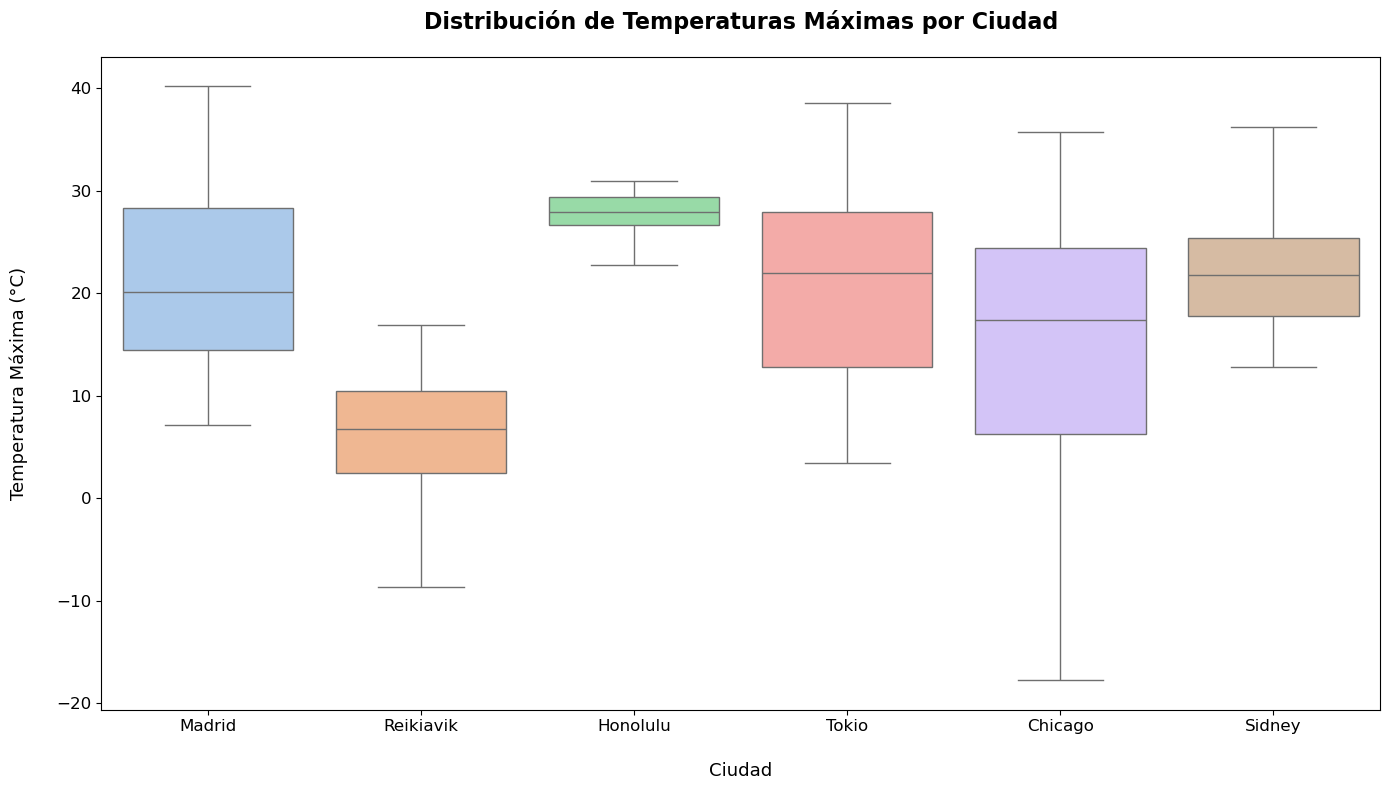

In [17]:
plt.figure(figsize=(14,8))

ax = sns.boxplot(data = df, x='Ciudad', y= 'Temperatura máxima(°C)', hue='Ciudad', palette='pastel')

# Título y etiquetas
ax.set_title('Distribución de Temperaturas Máximas por Ciudad', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Ciudad', fontsize=13, labelpad=20)
ax.set_ylabel('Temperatura Máxima (°C)', fontsize=13, labelpad=20)

# Mejorar legibilidad etiquetas X (rotación y tamaño)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.tight_layout()  # Ajusta para que no se corten etiquetas
plt.show()

### Distribución de Temperaturas Mínimas por Ciudad

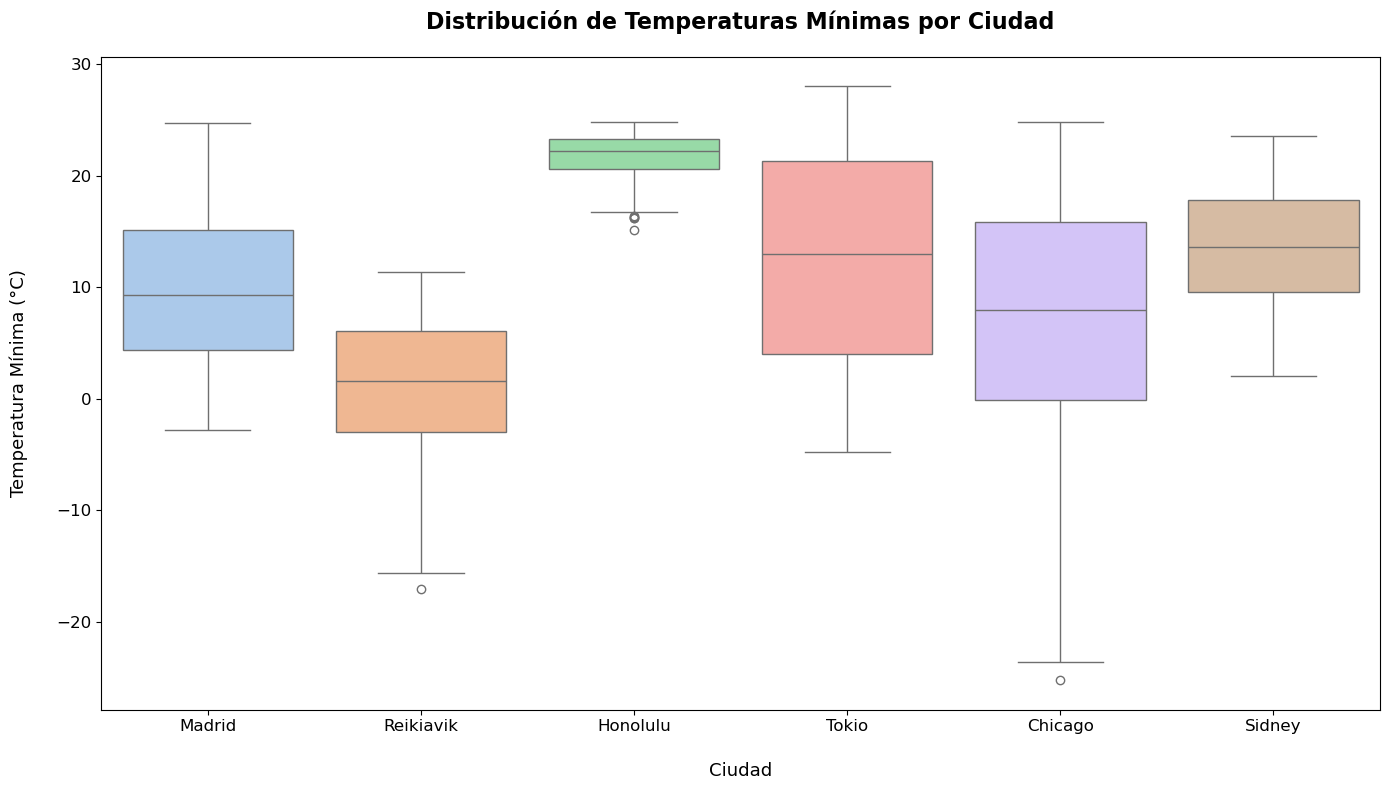

In [18]:
plt.figure(figsize=(14,8))

ax = sns.boxplot(data = df, x='Ciudad', y= 'Temperatura mínima(°C)', hue='Ciudad', palette='pastel')

# Título y etiquetas
ax.set_title('Distribución de Temperaturas Mínimas por Ciudad', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Ciudad', fontsize=13, labelpad=20)
ax.set_ylabel('Temperatura Mínima (°C)', fontsize=13, labelpad=20)

# Mejorar legibilidad etiquetas X (rotación y tamaño)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.tight_layout()  # Ajusta para que no se corten etiquetas
plt.show()

Podemos observar que existen varios valores atípicos (outliers), vamos a investigarlos.

### Detección de Outliers

In [19]:
def detectar_outliners(grupo):
    Q1 = grupo['Temperatura mínima(°C)'].quantile(0.25)
    Q3 = grupo['Temperatura mínima(°C)'].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    return grupo[(grupo['Temperatura mínima(°C)'] < limite_inferior) | (grupo['Temperatura mínima(°C)'] > limite_superior)]

outliers_por_ciudad = df.groupby('Ciudad', group_keys=False).apply(detectar_outliners, include_groups=True)
outliers_por_ciudad 

C:\Users\jorge\AppData\Local\Temp\ipykernel_4176\2976956165.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outliers_por_ciudad = df.groupby('Ciudad', group_keys=False).apply(detectar_outliners, include_groups=True)


,Fecha,Temperatura máxima(°C),Temperatura mínima(°C),Suma de precipitaciones(mm),Velocidad máxima del viento(km/h),Duración de sol (segundos por día),Radiación solar(MJ/m²),Código de condiciones,Ciudad,Tiempo,Categoría del Tiempo,Temperatura media(°C),Mes
1478,2024-01-15,-17.7,-25.2,0.0,25.3,26767.58,8.79,3,Chicago,Overcast,cloudy,-21.45,1
742,2024-01-11,25.5,16.4,2.0,33.9,30130.31,15.33,53,Honolulu,Drizzle: Moderate,drizzle,20.95,1
744,2024-01-13,23.9,16.2,0.0,18.1,35647.13,15.61,3,Honolulu,Overcast,cloudy,20.05,1
745,2024-01-14,24.7,15.1,0.0,15.0,36110.05,18.14,3,Honolulu,Overcast,cloudy,19.90,1
746,2024-01-15,24.5,16.2,0.0,18.4,35211.20,17.04,3,Honolulu,Overcast,cloudy,20.35,1
774,2024-02-12,26.7,16.3,0.1,21.0,37196.20,18.24,51,Honolulu,Drizzle: Light,drizzle,21.50,2
729,2024-12-29,-4.3,-17.1,0.0,15.4,8224.35,0.27,3,Reikiavik,Overcast,cloudy,-10.70,12


Outliers en las temperaturas mínimas.  
Tras aplicar un análisis de valores atípicos usando el método del rango intercuartílico (IQR), se identificaron varios días con temperaturas mínimas inusuales en distintas ciudades:

- En Chicago, se detectó un día con una temperatura mínima extremadamente baja de -25.2 °C, destacando como un evento climático severo.

- En Honolulu, varios días presentaron temperaturas mínimas significativamente altas en comparación con el resto de los registros de esa ciudad, como los 16.2 °C – 16.4 °C, lo cual puede indicar un patrón inusual de calor o un microclima específico durante esas fechas.

- En Reikiavik, se registró una temperatura mínima de -17.1 °C, destacando también como una anomalía frente al comportamiento general de esa ciudad.

### Distribución de Temperaturas Medias por Ciudad

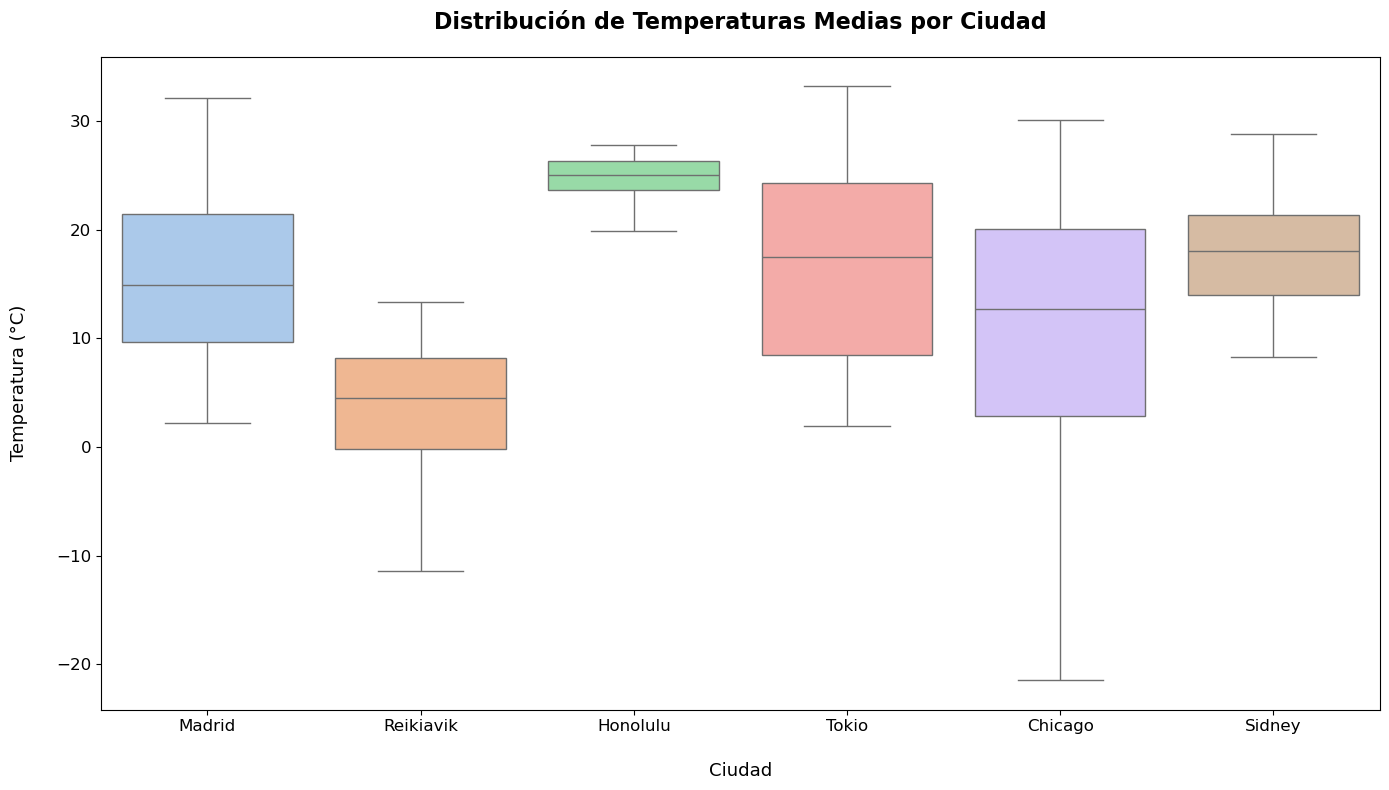

In [20]:
plt.figure(figsize=(14,8))

ax = sns.boxplot(data = df, x='Ciudad', y= 'Temperatura media(°C)', hue='Ciudad', palette='pastel')

# Título y etiquetas
ax.set_title('Distribución de Temperaturas Medias por Ciudad', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Ciudad', fontsize=13, labelpad=20)
ax.set_ylabel('Temperatura (°C)', fontsize=13, labelpad=20)

# Mejorar legibilidad etiquetas X (rotación y tamaño)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.tight_layout()  # Ajusta para que no se corten etiquetas
plt.show()

Podemos sacar varias conclusiones claves de este gráfico:

- Mayor estabilidad térmica: Honolulu.

- Mayor variabilidad: Chicago.

- Ciudad más fría: Reikiavik.

- Ciudad con clima más extremo: Chicago (por amplitud térmica).

- Temperaturas mínimas más altas: Honolulu, seguida por Sidney.

## Temperatura a lo largo del año 2024

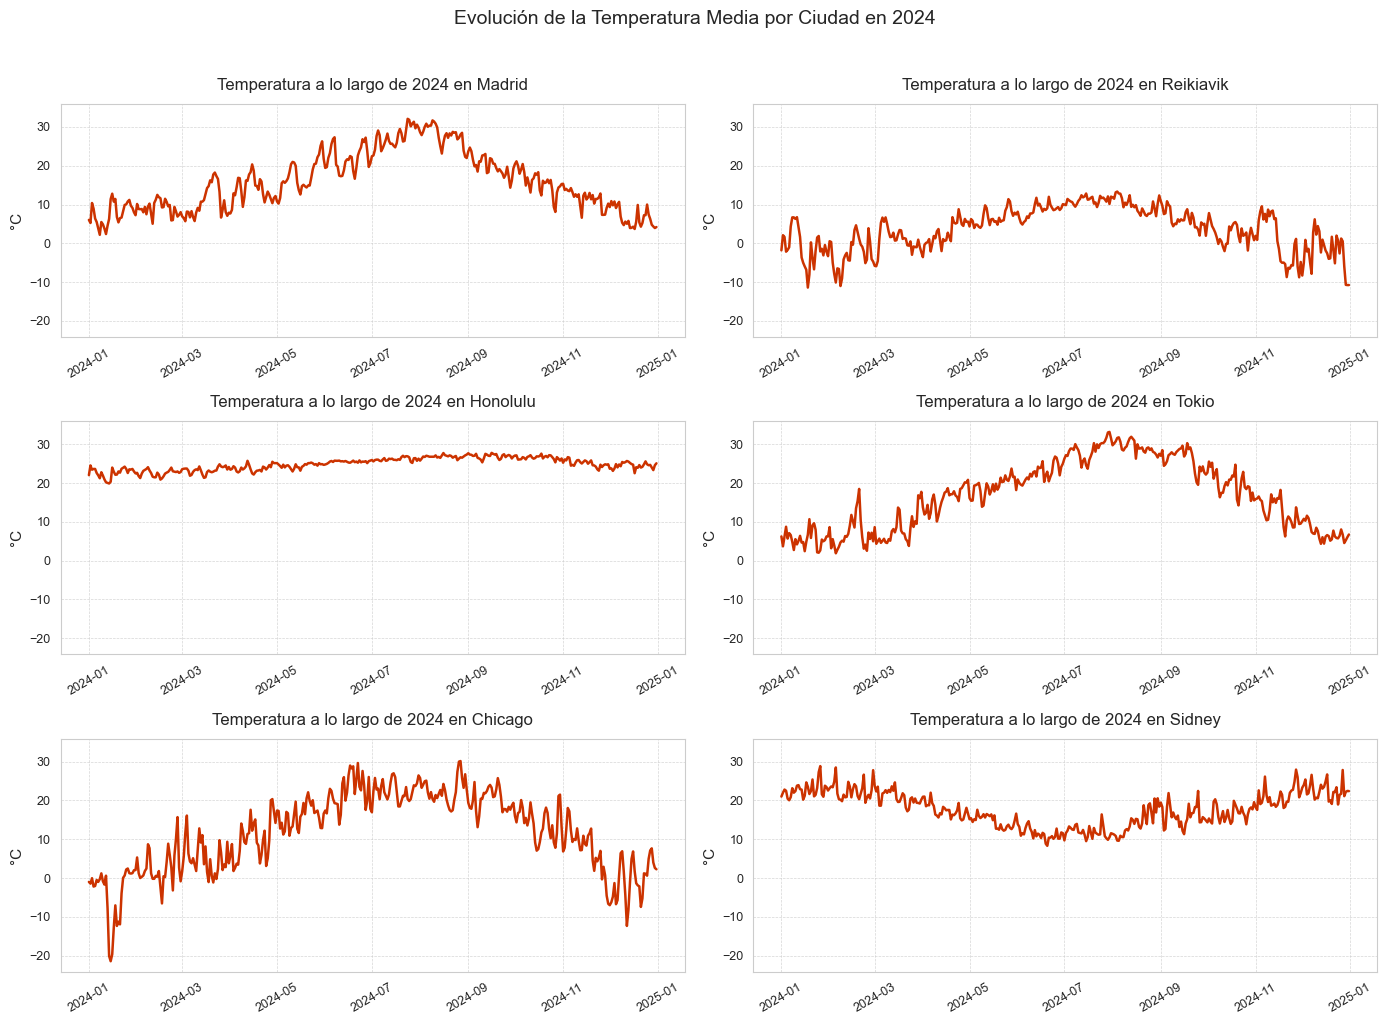

In [21]:
# Estilo general
sns.set_style("whitegrid")

# Calcular los límites con un margen
ymin = df['Temperatura media(°C)'].min()
ymax = df['Temperatura media(°C)'].max()
yrange = ymax - ymin
margen = yrange * 0.05  # 5% de margen

# Crear los subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 10))
axes = axes.flatten()

for i, ciudad in enumerate(df['Ciudad'].unique()):
    df_ciudad = df[df['Ciudad'] == ciudad]
    
    sns.lineplot(
        ax=axes[i],
        data=df_ciudad,
        x='Fecha',
        y='Temperatura media(°C)',
        linewidth=1.8,
        color='#CC3300'
    )
    
    axes[i].set_title(f'Temperatura a lo largo de 2024 en {ciudad}', fontsize=12, pad=10)
    axes[i].tick_params(axis='both', labelsize=9)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('°C', fontsize=11)
    axes[i].set_ylim(ymin - margen, ymax + margen)
    axes[i].tick_params(axis='x', rotation=30)

    # Cuadrícula más suave
    axes[i].grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.8)

# Ajuste del espaciado general
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.suptitle('Evolución de la Temperatura Media por Ciudad en 2024', fontsize=14, y=1.02)

plt.tight_layout()
plt.show()

- Madrid, Tokio y Chicago presentan una marcada variación estacional: Las temperaturas aumentan progresivamente desde enero hasta alcanzar un máximo en julio-agosto, y descienden hacia diciembre.
- Sídney, al estar en el hemisferio sur, presenta un patrón opuesto: Las temperaturas son más altas al inicio y al final del año (verano austral), y más bajas en los meses centrales (invierno austral).
- Honolulu muestra una curva térmica casi plana, con temperaturas estables entre 23 °C y 27 °C todo el año.
- Chicago muestra la mayor amplitud térmica anual, con inviernos muy fríos (por debajo de −15 °C) y veranos calurosos (superando los 30 °C).
- Reikiavik se mantiene en rangos fríos todo el año, rara vez superando los 10–12 °C incluso en verano, con inviernos que alcanzan temperaturas negativas.

# 2. Análisis de las Precipitaciones

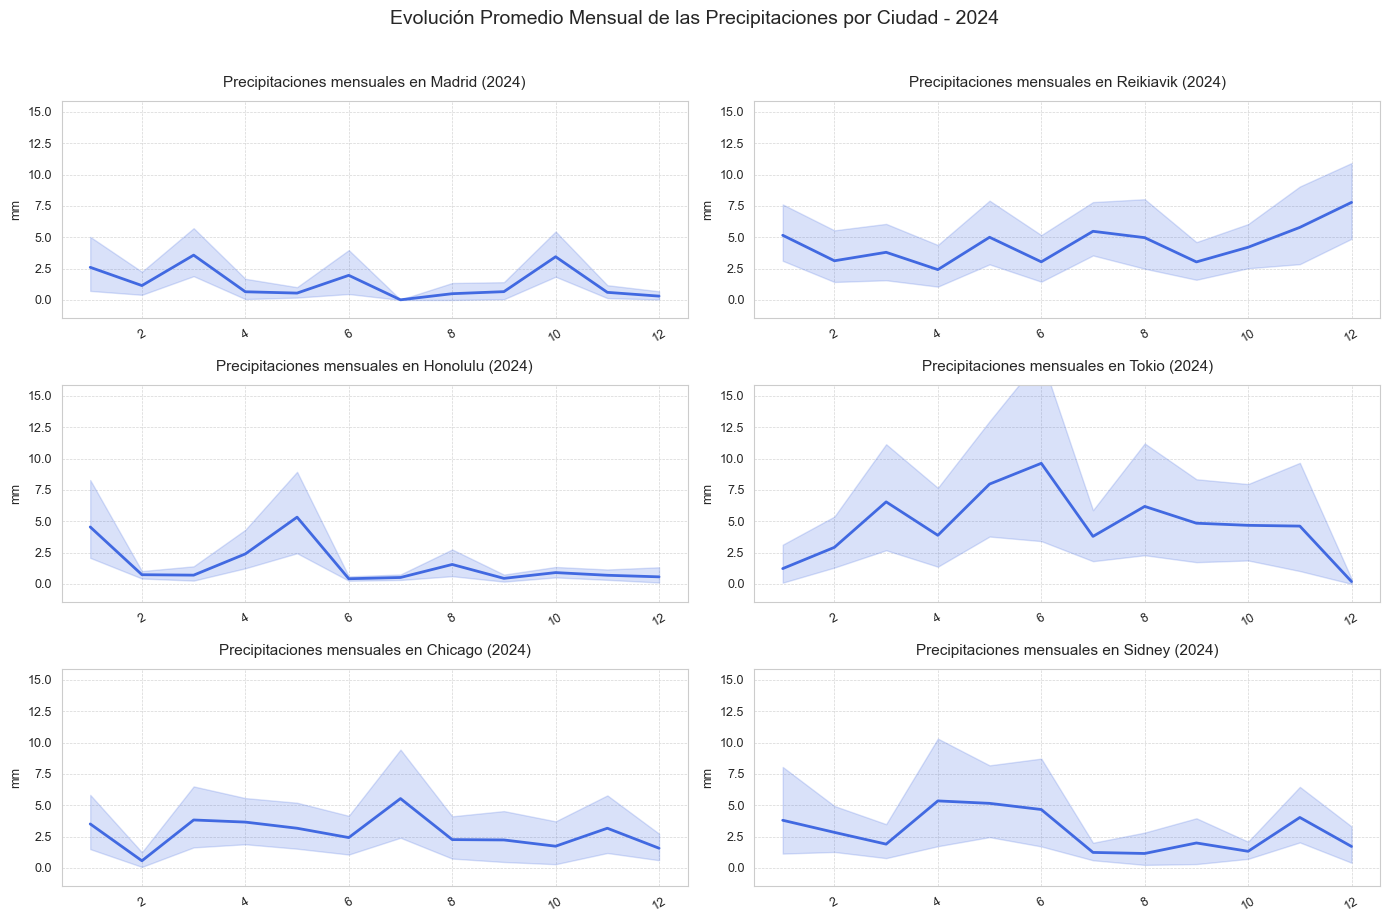

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual
sns.set_style("whitegrid")

# Creamos figura y ejes
fig, axes = plt.subplots(3, 2, figsize=(14, 9))
axes = axes.flatten()

# Calculamos rango global de medias mensuales
media_mensual = df.groupby(['Ciudad', 'Mes'])['Suma de precipitaciones(mm)'].mean()
ymin = media_mensual.min()
ymax = media_mensual.max() * 1.5

# Calculamos margen (10%)
rango = ymax - ymin
margen = 0.1 * rango

# Creamos gráfico para cada ciudad
for i, ciudad in enumerate(df['Ciudad'].unique()):
    df_ciudad = df[df['Ciudad'] == ciudad]

    sns.lineplot(
        ax=axes[i],
        data=df_ciudad,
        x='Mes',
        y='Suma de precipitaciones(mm)',
        estimator='mean',
        color='royalblue',
        linewidth=2
    )

    axes[i].set_title(f'Precipitaciones mensuales en {ciudad} (2024)', fontsize=11, pad=10)
    axes[i].tick_params(axis='both', labelsize=9)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('mm', fontsize=9)
    axes[i].set_ylim(ymin - margen, ymax + margen)
    axes[i].tick_params(axis='x', rotation=30)

    # Cuadrícula más suave
    axes[i].grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.8)

# Título general y espaciado
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.suptitle('Evolución Promedio Mensual de las Precipitaciones por Ciudad - 2024', fontsize=14, y=1.02)

plt.tight_layout()
plt.show()


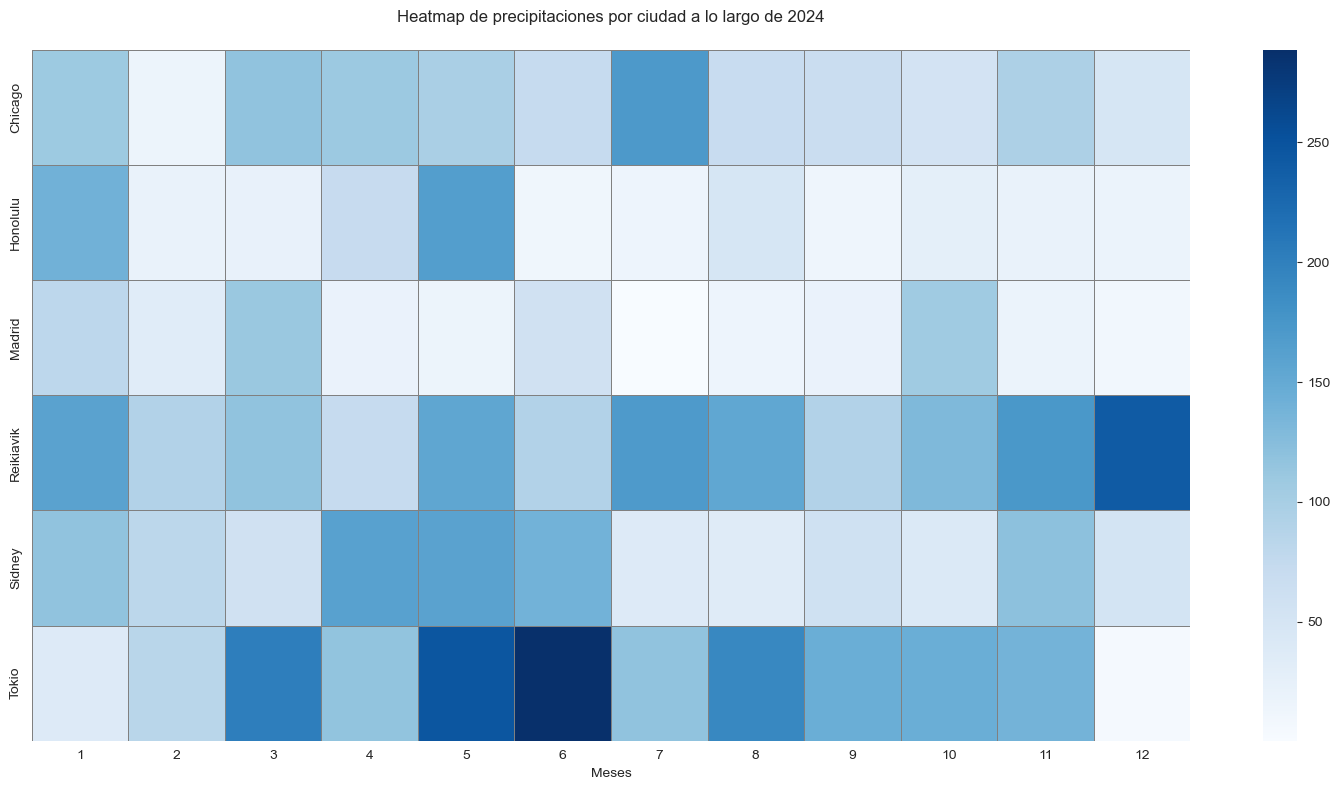

In [23]:
# Creamos la tabla pivote que necesitamos para crear el mapa de calor
pivot = df.pivot_table(index='Ciudad', columns='Mes', values='Suma de precipitaciones(mm)', aggfunc='sum')

plt.figure(figsize=(15,8))

# Dibujamos el heatmap
sns.heatmap(pivot, cmap='Blues', linewidths=0.5, linecolor='gray')

plt.title('Heatmap de precipitaciones por ciudad a lo largo de 2024', pad = 20)
plt.xlabel('Meses')
plt.ylabel('')

plt.tight_layout()
plt.show()

- Tokio destaca como la ciudad con más precipitaciones, especialmente entre los meses de mayo y agosto

- Reikiavik muestra precipitaciones bastante constantes durante todo el año, con un pico notable en diciembre

- Sídney presenta lluvias más frecuentes en otoño e invierno, especialmente entre marzo y junio

- Chicago tiene un patrón más equilibrado, aunque julio muestra un aumento considerable de precipitaciones

- Honolulu y Madrid son las ciudades más secas, con lluvias esporádicas y baja intensidad, principalmente en primavera

- La estacionalidad de las lluvias está claramente marcada en Tokio y Sídney, mientras que es mucho más dispersa en Reikiavik y Chicago

# 3. Relación entre el sol y la temperatura

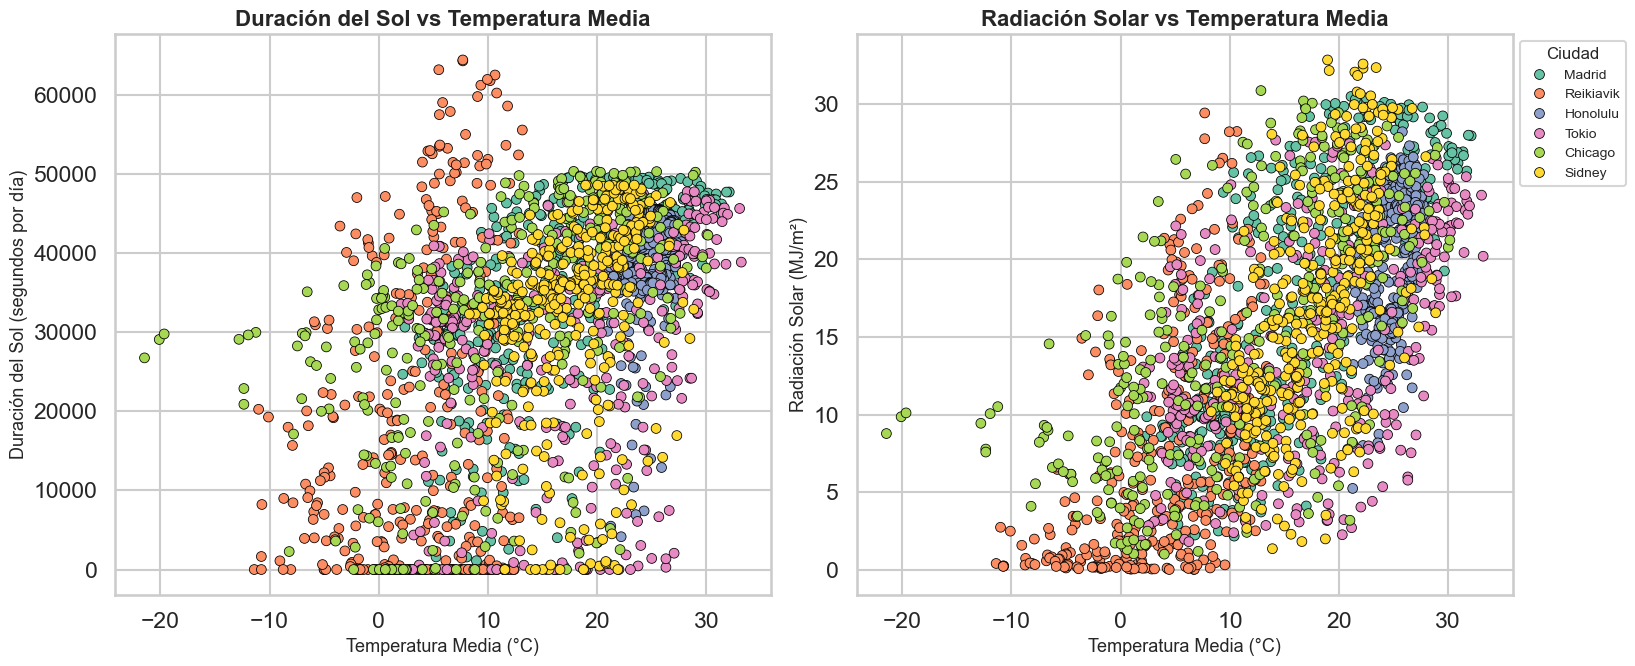

In [24]:
# Creamos un estilo general
sns.set(style="whitegrid", context="talk")

# Creamos figura y ejes
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharex=True)

# Paleta profesional
palette = sns.color_palette("Set2", n_colors=df['Ciudad'].nunique())

# Primer gráfico: Duración del sol
sns.scatterplot(
    ax=axes[0],
    data=df,
    x='Temperatura media(°C)',
    y='Duración de sol (segundos por día)',
    hue='Ciudad',
    palette= palette,
    s=50,
    edgecolor='black'
)
axes[0].set_title('Duración del Sol vs Temperatura Media', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Temperatura Media (°C)', fontsize=13)
axes[0].set_ylabel('Duración del Sol (segundos por día)', fontsize=13)

# Segundo gráfico: Radiación solar
sns.scatterplot(
    ax=axes[1],
    data=df,
    x='Temperatura media(°C)',
    y='Radiación solar(MJ/m²)',
    hue='Ciudad',
    palette=palette,
    s=50,
    edgecolor='black'
)
axes[1].set_title('Radiación Solar vs Temperatura Media', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Temperatura Media (°C)', fontsize=13)
axes[1].set_ylabel('Radiación Solar (MJ/m²)', fontsize=13)

# Ajustamos la leyenda (solo en uno para no repetir)
handles, labels = axes[1].get_legend_handles_labels()
axes[0].legend_.remove()  # quitamos la del primer gráfico
axes[1].legend(handles=handles, labels=labels, title='Ciudad', title_fontsize=12, fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.subplots_adjust(right=0.85)


plt.show()


#### Duración del Sol vs Temperatura Media
Observaciones generales:

- Hay cierta relación positiva entre temperatura media y duración del sol: a mayor temperatura, tiende a haber más duración de sol (aunque con dispersión).
- Sin embargo, la duración del sol varía mucho incluso con temperaturas similares, lo que sugiere que la nubosidad, la latitud o la estación del año también influyen fuertemente.


#### Radiación Solar vs Temperatura Media
Observaciones generales:

- Hay una relación positiva más clara entre temperatura media y radiación solar.
- A mayor temperatura, suele haber más radiación solar.
- Pero a diferencia de la duración del sol, la dispersión es menor.

Por ciudad:

- Madrid y Sidney presentan altos valores de radiación solar, especialmente en temperaturas cálidas.
- Reikiavik tiene valores de radiación solar generalmente bajos, incluso cuando la duración del sol es alta (por el ángulo del sol en latitudes altas).
- Honolulu tiene alta radiación solar, incluso con temperaturas no extremas, lo cual es esperable por su proximidad al ecuador.
- Chicago y Tokio tienen valores intermedios, aunque con dispersión.

# 4. Análisis de la distribución meteorológica por ciudad

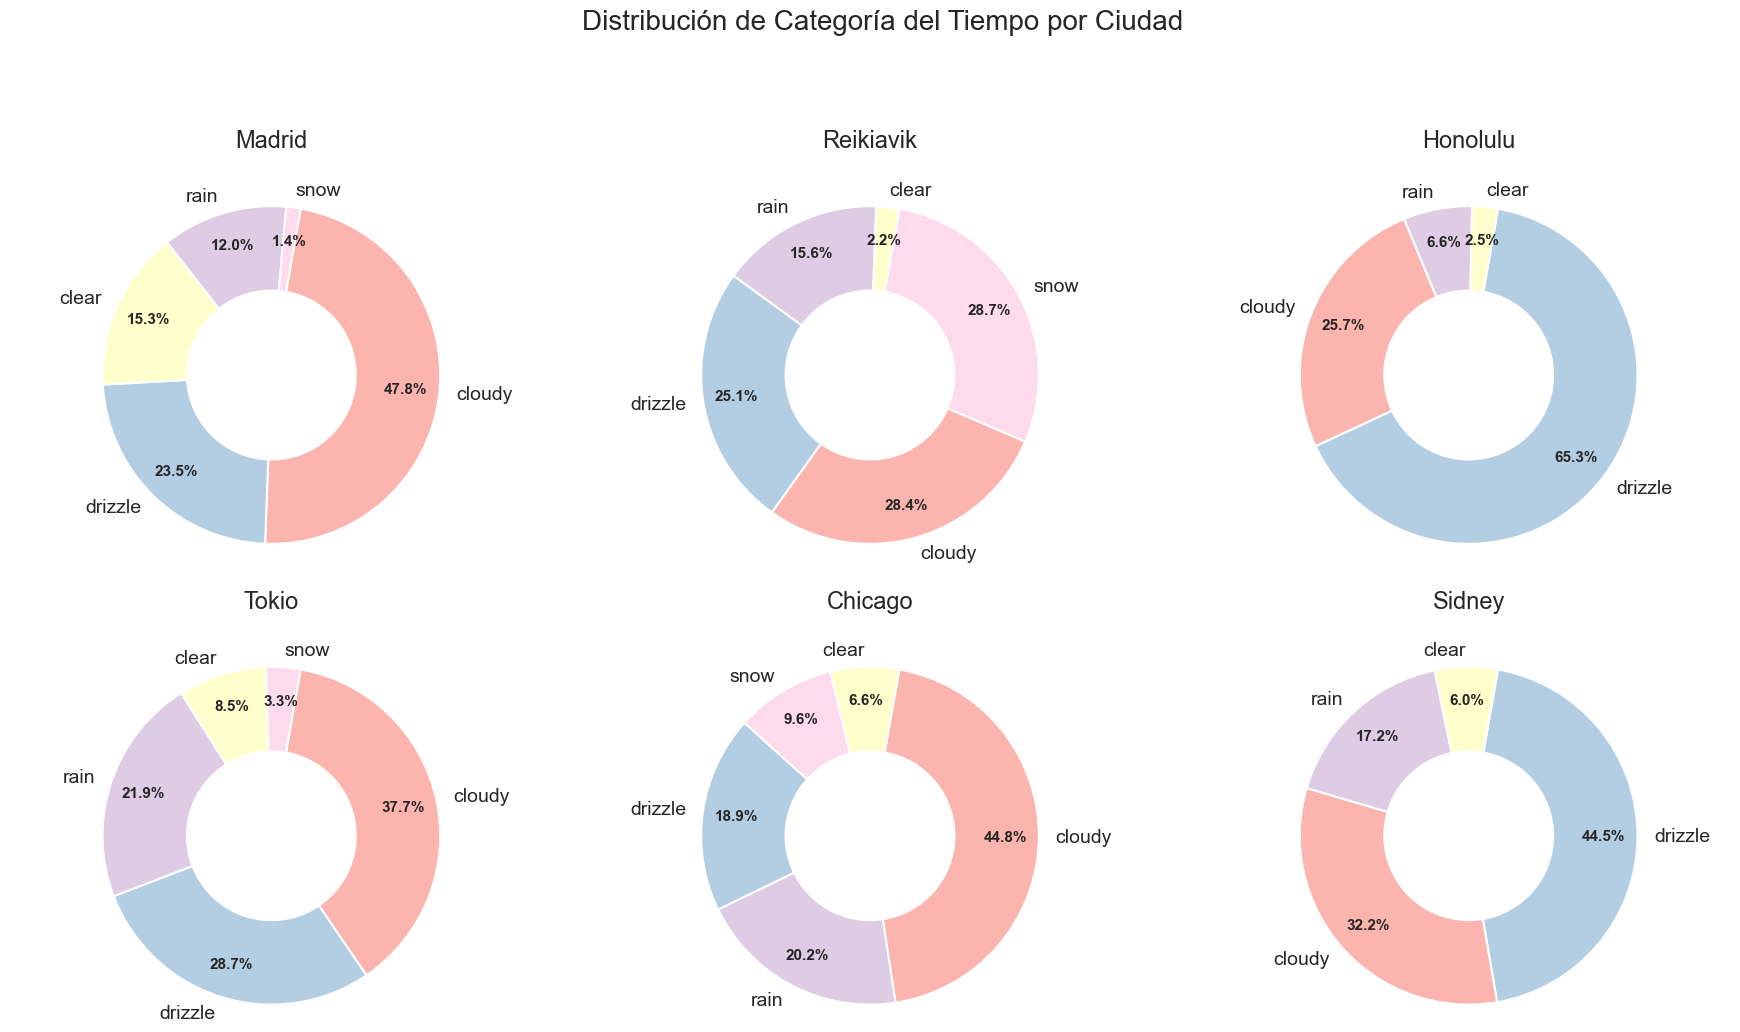

In [25]:
# Lista de ciudades únicas
ciudades = df['Ciudad'].unique()

# Categorías y color fijo para cada una usando Pastel1
categorias = df['Categoría del Tiempo'].unique()
colormap = plt.cm.Pastel1
colores_por_categoria = {cat: colormap(i / len(categorias)) for i, cat in enumerate(categorias)}

# Creamos figura y ejes
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, ciudad in enumerate(ciudades):
    datos_ciudad = df[df['Ciudad'] == ciudad]['Categoría del Tiempo'].value_counts()
    colores = [colores_por_categoria[cat] for cat in datos_ciudad.index]

    wedges, texts, autotexts = axes[i].pie(
        datos_ciudad,
        labels=datos_ciudad.index,
        pctdistance=0.8,
        autopct='%1.1f%%',
        startangle=80,
        counterclock=False,
        wedgeprops={'width': 0.5, 'edgecolor': 'w'},
        colors=colores
    )
    for text in texts:
        text.set_fontsize(14)
    for autotext in autotexts:
        autotext.set_fontsize(11)
        autotext.set_fontweight('bold') # Porcentaje en negrita para que destaque

    axes[i].set_title(f'{ciudad}', fontsize=17, pad=30)
    axes[i].axis('equal')

plt.suptitle('Distribución de Categoría del Tiempo por Ciudad', fontsize=20, y=1.04)
plt.tight_layout()

plt.show()


- El tiempo nublado y la llovizna son las condiciones dominantes en casi todas las ciudades analizadas, excepto en Reikiavik, donde la nieve es muy significativa.

- Honolulu presenta el porcentaje más elevado de llovizna (65.3%), reflejando un clima tropical estable y húmedo, sin extremos como nieve o lluvia intensa.

- Reikiavik y Chicago son las únicas ciudades con una proporción destacable de nieve, lo cual tiene sentido por su ubicación geográfica y latitud.

- Madrid y Tokio presentan una mezcla más equilibrada, pero aun así tienen poca presencia de días despejados.

- Sídney, a pesar de ser conocida por su buen clima, tiene una fuerte presencia de llovizna y cielos cubiertos, lo que podría contradecir percepciones comunes.

- En todas las ciudades, los días completamente despejados son minoría, lo cual indica que el sol directo es un fenómeno relativamente raro, incluso en zonas cálidas.